## Content
#### 1)Import Libraries
#### 2)Data Extraction and preparation
#### 3)Data Exploration
#### 4)Feature Selection
#### 5)Classification Models
#### 6)Inspecting the algo.

## Step-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step-2

In [2]:
bank_df = pd.read_csv("bank-loan.csv")
bank_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
copy_original_df = bank_df.copy() ## Copying the dataframe to ensure we have backup.
copy_original_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


We can see that we have 8 independent and 1 dependent feature, where all the independent features have int or float datatype.

In [5]:
bank_df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


Over here we can see that all columns have different data range so we have to standarise the data, which we will do in later steps.

In [6]:
columns = list(bank_df.columns)
columns.remove('default')
columns

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [7]:
bank_df['employ'].value_counts()

0     72
1     59
4     57
6     53
9     52
2     50
3     50
5     49
7     45
12    38
8     38
10    38
16    33
11    32
13    32
15    23
18    22
19    17
14    16
17    14
22    13
21    10
20     7
23     6
24     5
25     4
31     3
27     3
30     3
29     2
33     2
26     1
28     1
Name: employ, dtype: int64

In [8]:
bank_df.isnull().sum() #Checking for NULL values

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

We found that our target value is missing 150 values.

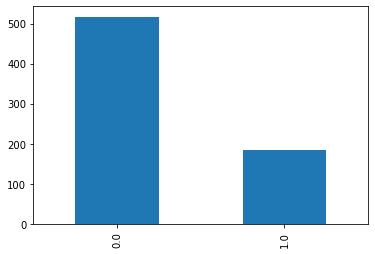

In [9]:
bank_df['default'].value_counts().plot.bar() ## Visualizing the plot to see the distribution of our target feature.
plt.show()

##### We saw missing values in target feature and we see that there is also imbalance data present but here we are classifying for loan default which is meant to be low.
##### Also,to deal with missing values we are storing that records in another data frame and removing the same records from our main dataframe.

In [10]:
index_null = []          ## Store indices value for null values
index_values = []        ## Store indices value for non-null values

for i in range(len(bank_df)):
    if(bank_df.iloc[i]['default']!=0 and bank_df.iloc[i]['default']!=1):  ## We will store the indices value of null entries.
        index_null.append(i)
        
    else:
        index_values.append(i)
        
index_values[1]

1

In [11]:
null_df = pd.DataFrame()             ## Null Dataframe
for i in range(len(index_null)):
       null_df[i] = bank_df.iloc[index_null[i],:]
null_df = null_df.transpose()
null_df.shape

(150, 9)

In [12]:
bank_df.drop(index_null,inplace=True)
bank_df.shape

(700, 9)

## Outlier Detection

C:\Users\91787\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91787\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91787\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91787\anaconda3\lib\si

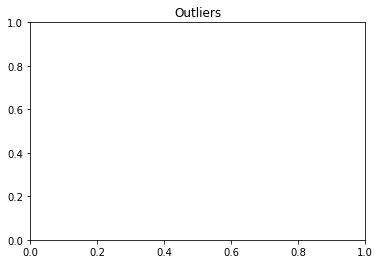

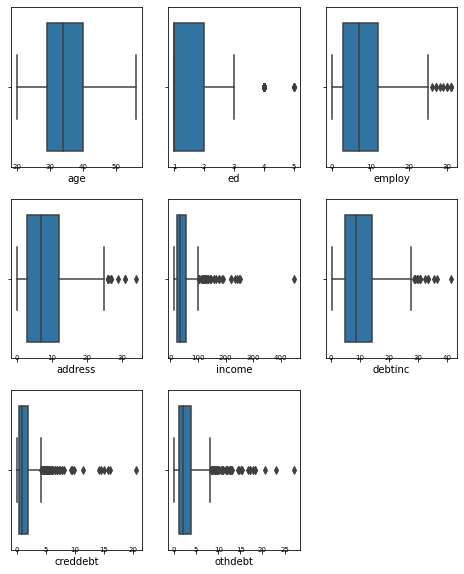

In [13]:
plt.title("Outliers")
fig,ax = plt.subplots(2,2,figsize=(8,10))
count = 0
for c in columns:
    count+=1
    plt.subplot(3,3,count)
    sns.boxplot(bank_df[c])
    plt.xlabel(c)
    plt.tick_params(axis='x',labelsize=7,pad=-7)
plt.show()

Although, we can observe the presence of outliers but over here we can accept these outliers. For example: if we have a record where income is greater that 50 or 40 which is different from other records but this scenario will also be important as the model will get the idea how to interpret the same inforamtion.

In [14]:
print(bank_df.shape)
bank_df = bank_df.reset_index(drop=True)

bank_df['age']

(700, 9)


0      41
1      27
2      40
3      41
4      24
       ..
695    36
696    29
697    33
698    45
699    37
Name: age, Length: 700, dtype: int64

## Step-3

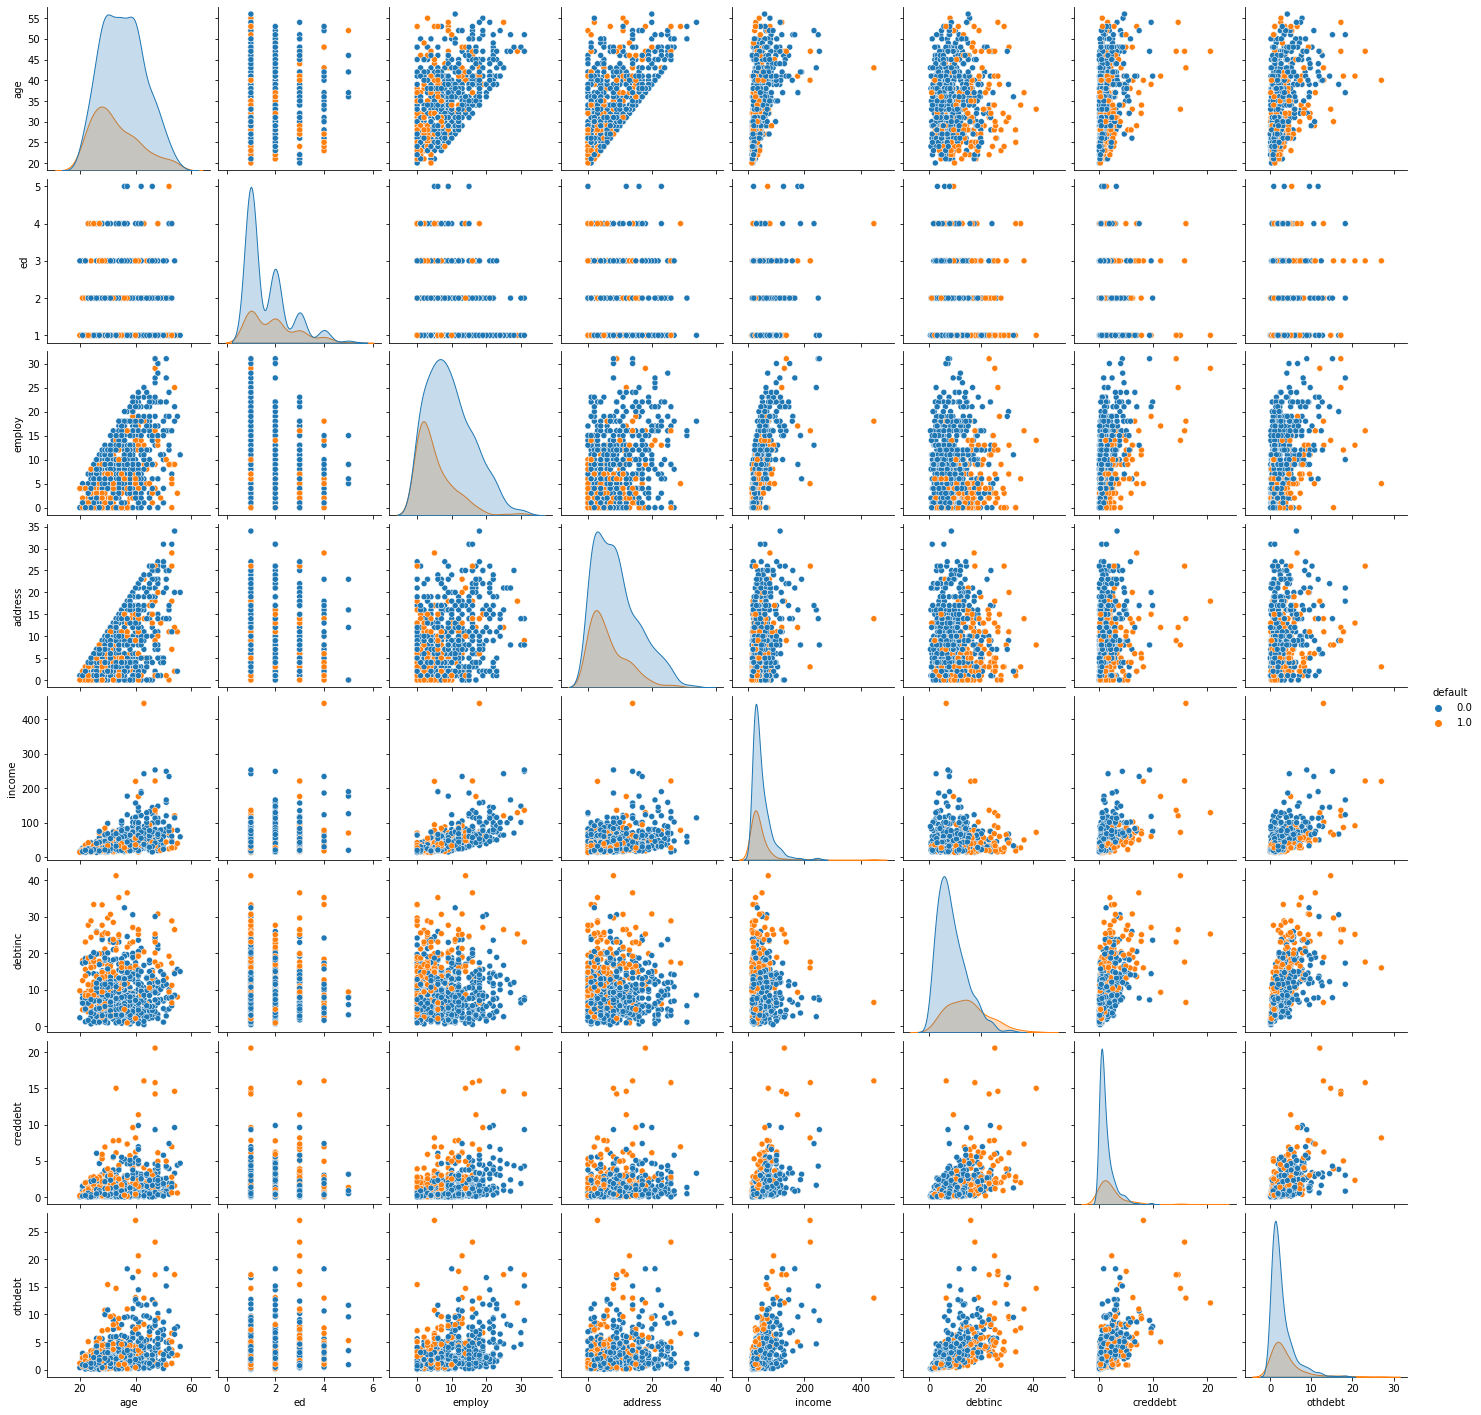

In [15]:
sns.pairplot(bank_df,diag_kind='kde',hue='default')
plt.show()

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


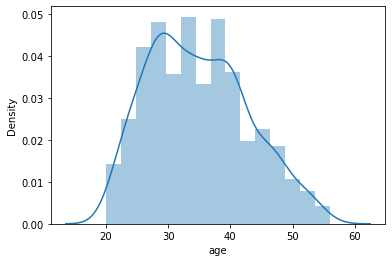

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


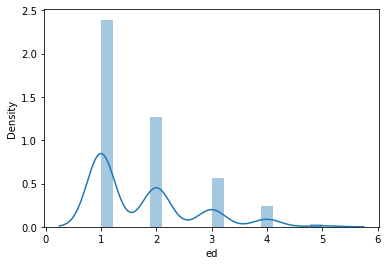

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


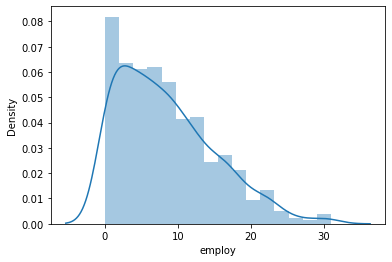

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


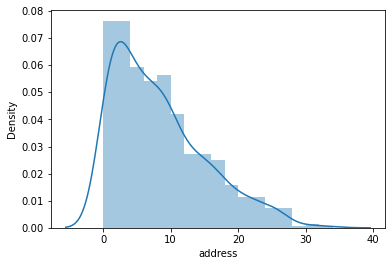

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


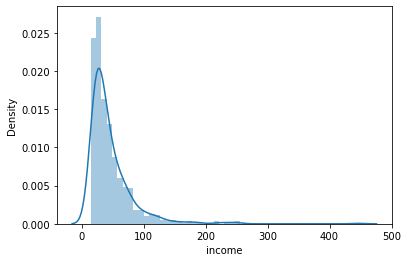

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


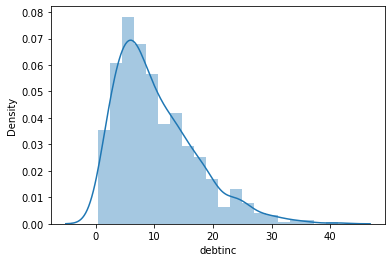

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


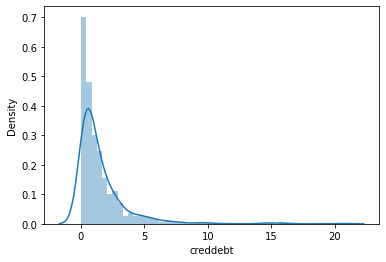

C:\Users\91787\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


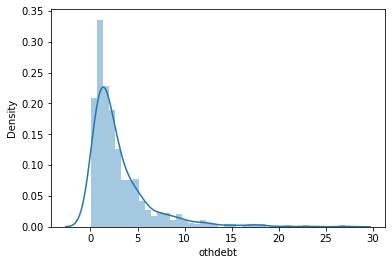

In [16]:
for c in columns:
    sns.distplot(bank_df[c])
    plt.show()


#### All independent variables are rightly/positively skewed.

In [17]:
#for c in columns:
 #   bank_df[c].value_counts().plot(kind='bar')
  #  plt.xlabel(c)
   # plt.show()

#### Visualizing to see the distribution of our independent features. 

<AxesSubplot:xlabel='employ'>

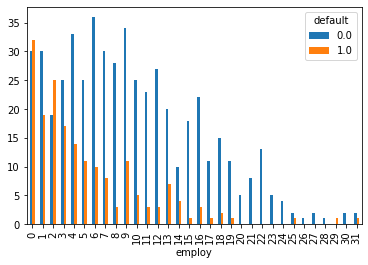

In [18]:
pd.crosstab(bank_df['employ'],bank_df['default']).plot(kind='bar')

#### We observe that  after value of employ reach to 17 absolutely no loan is defaulted. Also, chance of loan being defaulted is greater when employ is at initial stage.

<AxesSubplot:xlabel='ed'>

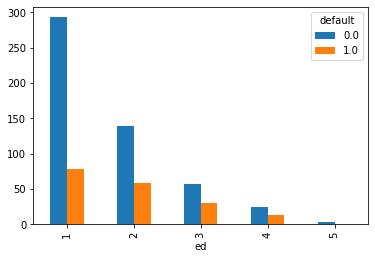

In [19]:
pd.crosstab(bank_df['ed'],bank_df['default']).plot(kind='bar')

#### Similarly, here for a person with educational qualification as 1 has very less chance of loan getting defaulted.Also, other groups have similar distribution.

<AxesSubplot:xlabel='age'>

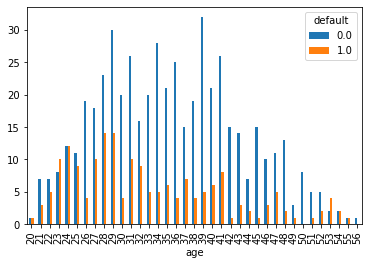

In [20]:
pd.crosstab(bank_df['age'],bank_df['default']).plot(kind='bar')

#### Chances of loan getting defalut is greater when a person is younger.

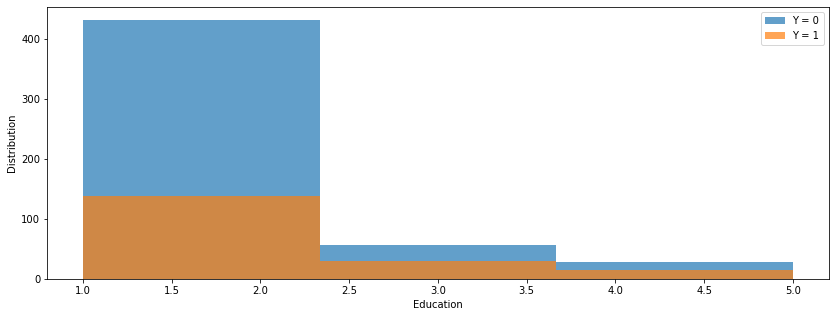

In [21]:
plt.figure(figsize=(14,5))

plt.hist(bank_df['ed'][bank_df['default'] == 0], bins=3, alpha = 0.7, label = 'Y = 0')
plt.hist(bank_df['ed'][bank_df['default'] == 1], bins=3, alpha = 0.7, label = 'Y = 1')
plt.ylabel('Distribution')
plt.xlabel('Education')
plt.legend()

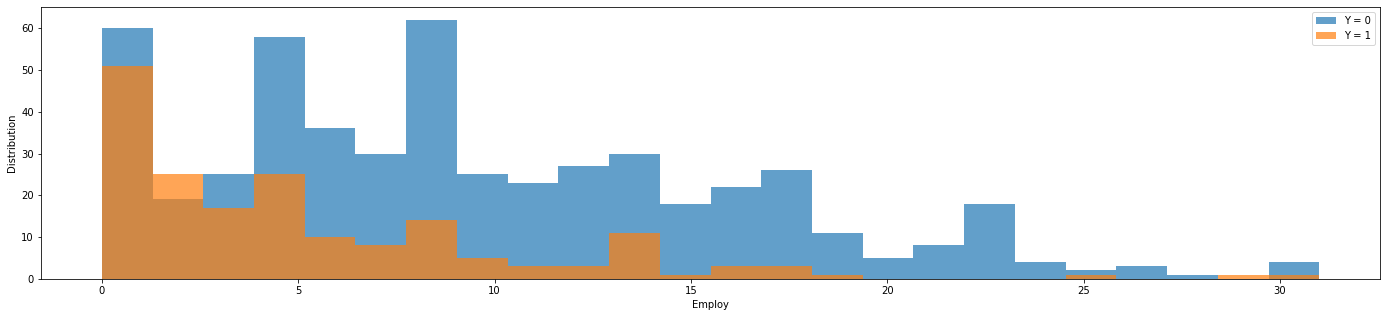

In [22]:
plt.figure(figsize=(24,5))

plt.hist(bank_df['employ'][bank_df['default'] == 0], bins=24, alpha = 0.7, label = 'Y = 0')
plt.hist(bank_df['employ'][bank_df['default'] == 1], bins=24, alpha = 0.7, label = 'Y = 1')
plt.ylabel('Distribution')
plt.xlabel('Employ')
plt.legend()

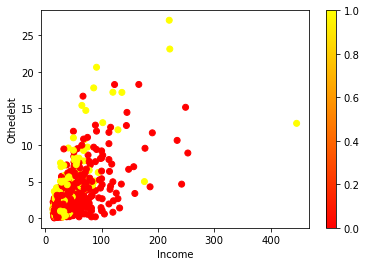

In [23]:
plt.scatter(bank_df['income'],bank_df['othdebt'],c=bank_df['default'],cmap='autumn')
plt.xlabel('Income')
plt.ylabel('Othedebt')
plt.colorbar()
plt.show()

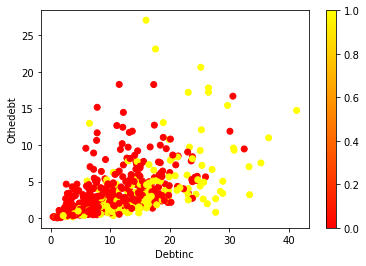

In [24]:
plt.scatter(bank_df['debtinc'],bank_df['othdebt'],c=bank_df['default'],cmap='autumn')
plt.xlabel('Debtinc')
plt.ylabel('Othedebt')
plt.colorbar()
plt.show()

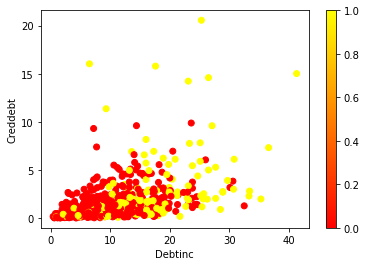

In [25]:
plt.scatter(bank_df['debtinc'],bank_df['creddebt'],c=bank_df['default'],cmap='autumn')
plt.xlabel('Debtinc')
plt.ylabel('Creddebt')
plt.colorbar()
plt.show()

#### We plotted the scatter plot between ,'income','debtinc,'creddebt','otherdebt' with target variable and observe the relationship.

In [26]:
columns = list(bank_df.columns)
columns.remove('default')
columns.remove('employ')
columns

['age', 'ed', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [27]:
for c in columns:
    print(bank_df[[c,'default']].groupby(by='default').mean())

               age
default           
0.0      35.514507
1.0      33.010929
               ed
default          
0.0      1.659574
1.0      1.901639
          address
default          
0.0      8.945841
1.0      6.393443
            income
default           
0.0      47.154739
1.0      41.213115
           debtinc
default           
0.0       8.679304
1.0      14.727869
         creddebt
default          
0.0      1.245493
1.0      2.423865
          othdebt
default          
0.0      2.773409
1.0      3.862807


#### For income we observe that as income increase less loan gets defaulted and as all other debt gets increase more loans gets defaulted, from which we can infer that there might be a linear relationship.

## Step-4

In [28]:
corr = bank_df.corr()
corr

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


### Plotting on Heatmap

<AxesSubplot:>

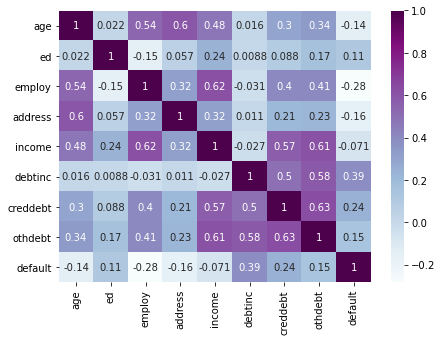

In [29]:
fig,ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr,cmap='BuPu',annot=True)

In [30]:
bank_df = bank_df.drop('address',axis=1)
columns.remove('address')

#### We will droping the, 'address' feature because it is not revealing as much information also it is not strongly correlated.

In [31]:
bank_df.head()

,age,ed,employ,income,debtinc,creddebt,othdebt,default
0,41,3,17,176,9.3,11.359392,5.008608,1.0
1,27,1,10,31,17.3,1.362202,4.000798,0.0
2,40,1,15,55,5.5,0.856075,2.168925,0.0
3,41,1,15,120,2.9,2.658720,0.821280,0.0
4,24,2,2,28,17.3,1.787436,3.056564,1.0


In [32]:
data_y = bank_df['default']
bank_df = bank_df.drop('default',axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler
scale_col = bank_df.columns
scaler = StandardScaler()  ## Standarizing the data.
scale_bank_df = pd.DataFrame(scaler.fit_transform(bank_df))
scale_bank_df.columns = scale_col
scale_bank_df.head()



,age,ed,employ,income,debtinc,creddebt,othdebt
0,0.768304,1.376911,1.294313,3.544603,-0.140798,4.634831,0.593692
1,-0.983529,-0.779325,0.242201,-0.396908,1.031818,-0.090444,0.286919
2,0.643173,-0.779325,0.993709,0.255480,-0.697790,-0.329670,-0.270693
3,0.768304,-0.779325,0.993709,2.022364,-1.078890,0.522369,-0.680910
4,-1.358922,0.298793,-0.960214,-0.478457,1.031818,0.110547,-0.000501


#### Using PCA to understand whether we can reduce the number of features.

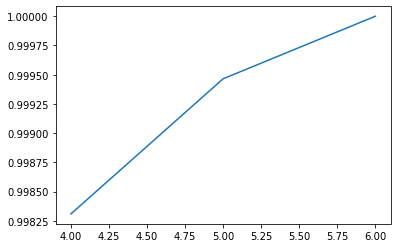

In [34]:
ratio = {}
for i in range(4,7):
    pca = PCA(n_components=i).fit(bank_df[columns])
    ratio[i] = sum(pca.explained_variance_ratio_)

pd.Series(ratio).plot()
plt.show()

#### We will be using all the features next steps.

## Step-5

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,roc_auc_score,precision_score,roc_curve,auc
from sklearn.pipeline import Pipeline

In [36]:
train_x,test_x,train_y,test_y = train_test_split(bank_df,data_y,test_size=0.3,random_state=42) ## Splitting the data into train and test.
print(train_x.shape)
print(test_x.shape)

(490, 7)
(210, 7)


#### Creating a function which we can repeatedly use for displaying the metrics of our model.

In [37]:
def metrics_algo(test,predict):
    print("Confusion Matrix")
    print(confusion_matrix(test,predict))
    
    print("Accuracy:",accuracy_score(test,predict))
    print("Precision:",precision_score(test,predict))
    print("F1 score:",f1_score(test,predict))
    print("Recall:",recall_score(test,predict))
    
    fpr,recall,thresholds = roc_curve(test,predict)
    print("Max:",max(thresholds))
    roc_auc = auc(fpr,recall)
    
    print("ROC:",roc_auc)
    
    plt.plot(fpr,recall,'b')
    plt.plot([0,1],[0,1],'r--')
    plt.title("AUC=%0.2f"%roc_auc)
    plt.show()

## Logistic regression

Confusion Matrix
[[152   9]
 [ 20  29]]
Accuracy: 0.861904761904762
Precision: 0.7631578947368421
F1 score: 0.6666666666666667
Recall: 0.5918367346938775
Max: 2.0
ROC: 0.7679680567879326


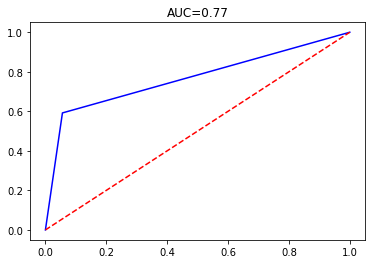

In [63]:
log = LogisticRegression(penalty='l2')
log_model = log.fit(train_x,train_y)
pred = log_model.predict(test_x)
metrics_algo(test_y,pred)

## Decision tree

Confusion Matrix
[[128  33]
 [ 26  23]]
Accuracy: 0.719047619047619
Precision: 0.4107142857142857
F1 score: 0.43809523809523815
Recall: 0.46938775510204084
Max: 2.0
ROC: 0.6322094055013309


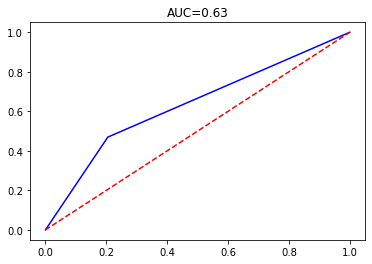

In [39]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(train_x,train_y)
tree_pred = tree_model.predict(test_x)
metrics_algo(test_y,tree_pred)

## Random forest

Confusion Matrix
[[152   9]
 [ 24  25]]
Accuracy: 0.8428571428571429
Precision: 0.7352941176470589
F1 score: 0.6024096385542169
Recall: 0.5102040816326531
Max: 2.0
ROC: 0.7271517302573203


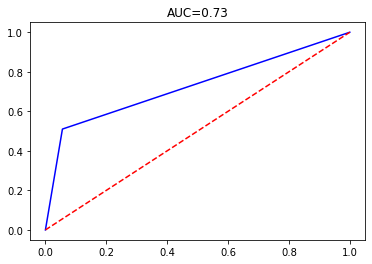

In [40]:
forest = RandomForestClassifier(criterion='entropy').fit(train_x,train_y)
forest_pred = forest.predict(test_x)
metrics_algo(test_y,forest_pred)

## Naive Bayes

Confusion Matrix
[[146  15]
 [ 29  20]]
Accuracy: 0.7904761904761904
Precision: 0.5714285714285714
F1 score: 0.47619047619047616
Recall: 0.40816326530612246
Max: 2.0
ROC: 0.6574977817213842


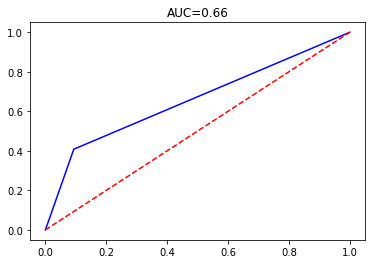

In [41]:
naive = GaussianNB().fit(train_x,train_y)
naive_pred = naive.predict(test_x)
metrics_algo(test_y,naive_pred)

#### Choosing the logistic regression 

## Step-6
#### If we are interested in a threshold that results in the best balance of precision and recall, then this is the same as optimizing the F-measure that summarizes the harmonic mean of both measures.

F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [42]:
def to_labels(prob,t):
    return(prob>=t).astype('int')

In [43]:
from numpy import arange,argmax
y_pred_prob = log_model.predict_proba(test_x)
probs = y_pred_prob[:,1]
thresholds = arange(0,1,0.001)

scores = [f1_score(test_y,to_labels(probs,t))for t in thresholds]
ix = argmax(scores)
print("Threshold=%.3f , F-score=%.5f"%(thresholds[ix],scores[ix]))

Threshold=0.561 , F-score=0.67500


#### We observe that threshold is around 0.5 only, so will not chnage the threshold value.